In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import yfinance as yf


In [ ]:
ticker = 'AAPL'
df = yf.download(ticker, start='2010-01-01', end='2022-12-31', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head

<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04    7.622500    7.660714    7.585000    7.643214    6.478998   
2010-01-05    7.664286    7.699643    7.616071    7.656429    6.490201   
2010-01-06    7.656429    7.686786    7.526786    7.534643    6.386965   
2010-01-07    7.562500    7.571429    7.466071    7.520714    6.375156   
2010-01-08    7.510714    7.571429    7.466429    7.570714    6.417539   
...                ...         ...         ...         ...         ...   
2022-12-23  130.919998  132.419998  129.639999  131.860001  131.127060   
2022-12-27  131.380005  131.410004  128.720001  130.029999  129.307236   
2022-12-28  129.669998  131.029999  125.870003  126.040001  125.339417   
2022-12-29  127.989998  130.479996  127.730003  129.610001  128.889572   
2022-12-30  128.410004  129.949997  127.430000  129.929993  129.207779   

       

In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03
mean,51.297746,51.869747,50.731996,51.321186,49.194746,2.562707e+08
std,47.328490,47.938843,46.732224,47.357062,47.558153,2.225648e+08
min,6.870357,7.000000,6.794643,6.858929,5.814176,3.519590e+07
25%,18.966697,19.121697,18.780179,18.967589,16.533896,1.023541e+08
50%,29.756250,29.981250,29.561250,29.815000,27.234153,1.666698e+08
75%,56.983748,57.309999,56.469999,56.777499,54.648005,3.456643e+08
max,182.630005,182.940002,179.119995,182.009995,179.953888,1.880998e+09


In [ ]:
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()

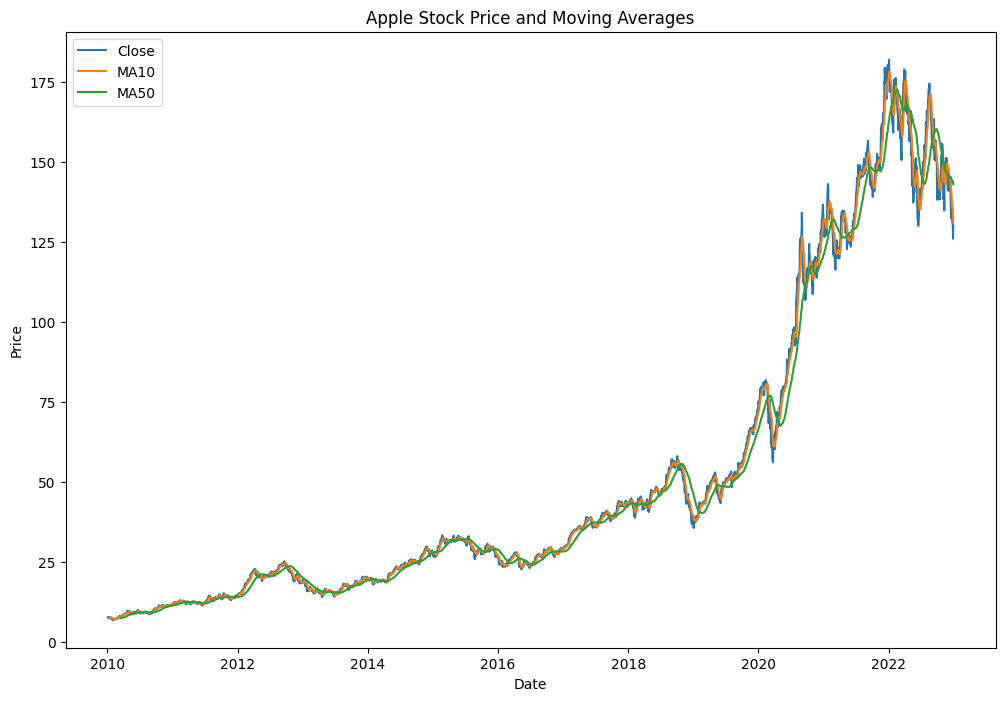

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'], label='Close')
plt.plot(df['MA10'], label='MA10')
plt.plot(df['MA50'], label='MA50')
plt.title('Apple Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
df['Upper'] = df['MA50'] + 2 * df['Close'].rolling(20).std()
df['Lower'] = df['MA50'] - 2 * df['Close'].rolling(20).std()

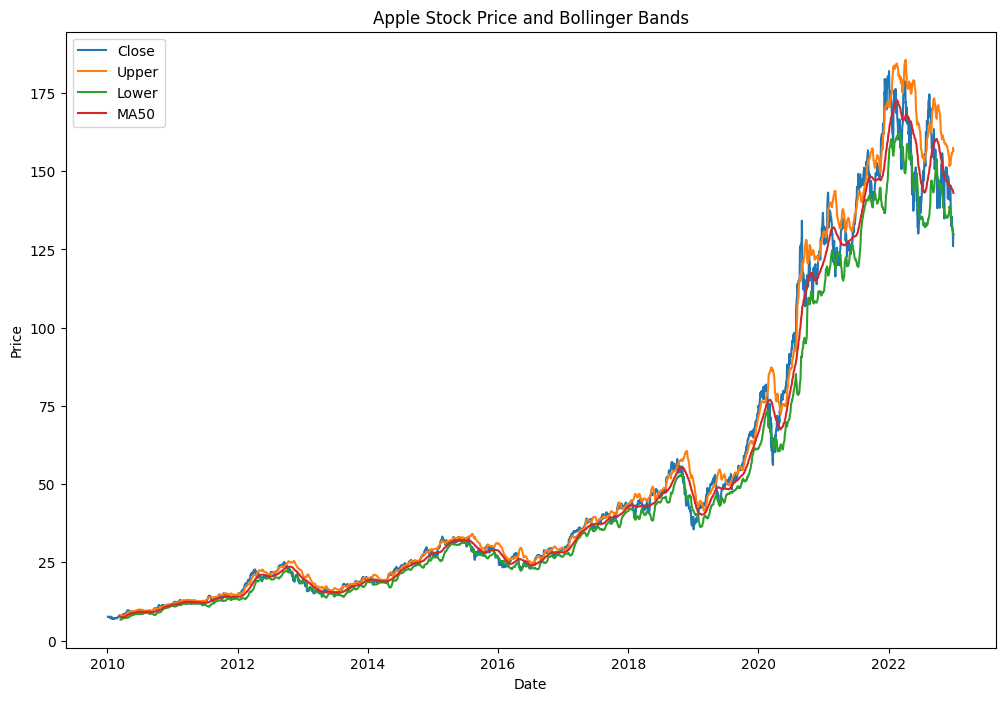

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'], label='Close')
plt.plot(df['Upper'], label='Upper')
plt.plot(df['Lower'], label='Lower')
plt.plot(df['MA50'], label='MA50')
plt.title('Apple Stock Price and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()